In [1]:
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import shap 
import numpy as np

# Import datasets

In [2]:
csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31G_X_TEST.csv")
G_X_test = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31B_X_TEST.csv")
B_X_test = pd.read_csv(csv_path)

# ET_G

In [3]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "TSR_ALL31G_ET_CALIBRATED.pkl")
G_ET_CALIBRATED = joblib.load(pkl_path)

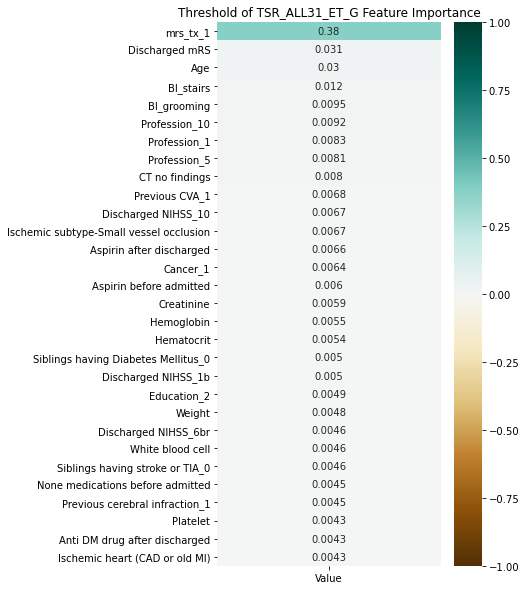

In [4]:
etG_fi = G_ET_CALIBRATED.base_estimator._final_estimator.feature_importances_
etG_fi_df = pd.DataFrame(etG_fi)
etG_fi_df.index = G_X_test.columns
etG_fi_df.columns = (["Value"])
etG_fi_plot = etG_fi_df.sort_values(["Value"], ascending=False).head(30)

plt.figure(figsize=(5, 10))
sns.heatmap(etG_fi_plot, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Threshold of TSR_ALL31_ET_G Feature Importance')
#plt.savefig('PLOT/TSR_ALL31/FI_G31_ET.png')
plt.show()

 99%|===================| 11285/11364 [01:32<00:00]        

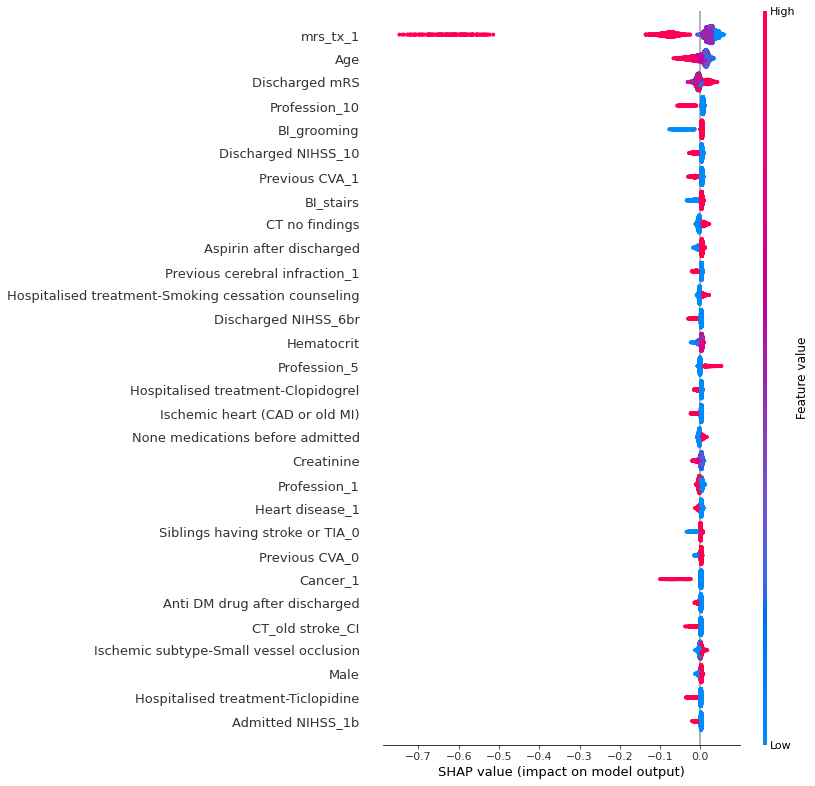

In [5]:
etG31_shap_values = shap.TreeExplainer(G_ET_CALIBRATED.base_estimator._final_estimator, G_X_test).shap_values(G_X_test)
shap.summary_plot(etG31_shap_values[1], G_X_test, max_display=30)

# XGBC_G

In [6]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "TSR_ALL31G_XGBC_CALIBRATED.pkl")
G_XGBC_CALIBRATED = joblib.load(pkl_path)

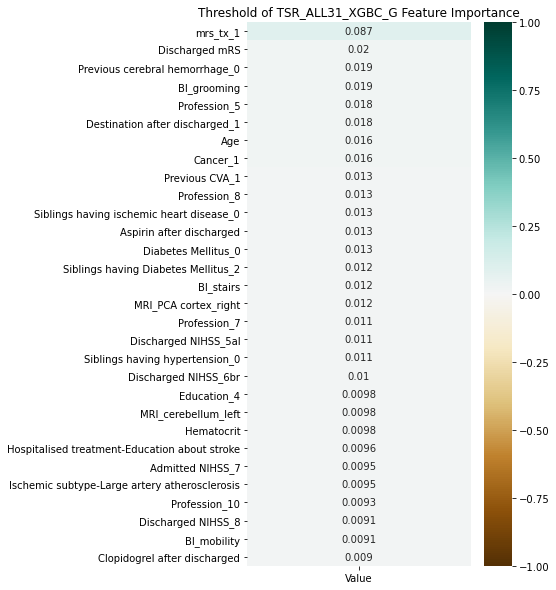

In [7]:
xgbcG_fi = G_XGBC_CALIBRATED.base_estimator._final_estimator.feature_importances_
xgbcG_fi_df = pd.DataFrame(xgbcG_fi)
xgbcG_fi_df.index = G_X_test.columns
xgbcG_fi_df.columns = (["Value"])
xgbcG_fi_plot = xgbcG_fi_df.sort_values(["Value"], ascending=False).head(30)

plt.figure(figsize=(5, 10))
sns.heatmap(xgbcG_fi_plot, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Threshold of TSR_ALL31_XGBC_G Feature Importance')
#plt.savefig('PLOT/TSR_ALL31/FI_G31_XGBC.png')
plt.show()

100%|===================| 5677/5682 [00:13<00:00]        

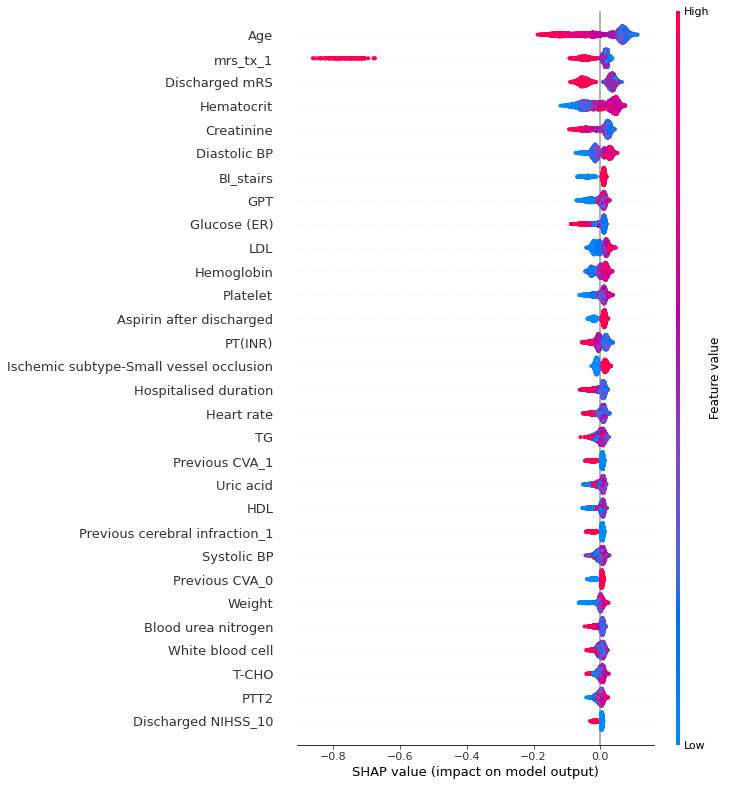

In [8]:
xgbcG31_shap_values = shap.TreeExplainer(G_XGBC_CALIBRATED.base_estimator._final_estimator, G_X_test).shap_values(G_X_test)
shap.summary_plot(xgbcG31_shap_values, G_X_test, max_display=30)

# ET_B

In [9]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "TSR_ALL31B_ET_CALIBRATED.pkl")
B_ET_CALIBRATED = joblib.load(pkl_path)

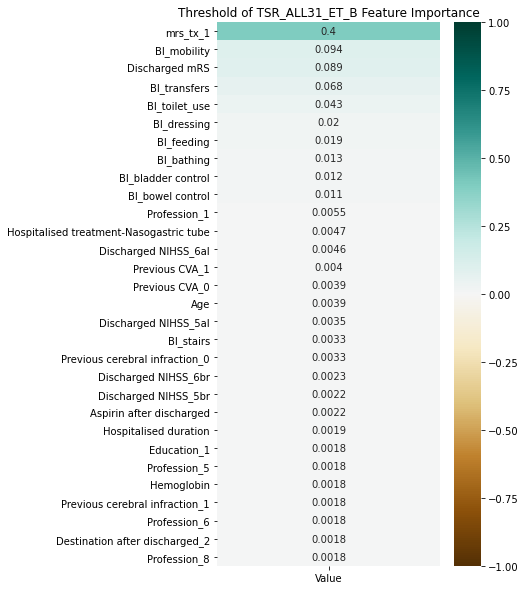

In [10]:
etB_fi = B_ET_CALIBRATED.base_estimator._final_estimator.feature_importances_
etB_fi_df = pd.DataFrame(etB_fi)
etB_fi_df.index = B_X_test.columns
etB_fi_df.columns = (["Value"])
etB_fi_plot = etB_fi_df.sort_values(["Value"], ascending=False).head(30)

plt.figure(figsize=(5, 10))
sns.heatmap(etB_fi_plot, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Threshold of TSR_ALL31_ET_B Feature Importance')
#plt.savefig('PLOT/TSR_ALL31/FI_B31_ET.png')
plt.show()

In [ ]:
etB31_shap_values = shap.TreeExplainer(B_ET_CALIBRATED.base_estimator._final_estimator, B_X_test).shap_values(B_X_test)
shap.summary_plot(etB31_shap_values[1], B_X_test, max_display=30)

 61%|============        | 7686/12566 [01:52<01:11]       

# XGBC_B

In [ ]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "TSR_ALL31B_XGBC_CALIBRATED.pkl")
B_XGBC_CALIBRATED = joblib.load(pkl_path)

In [ ]:
xgbcB_fi = B_XGBC_CALIBRATED.base_estimator._final_estimator.feature_importances_
xgbcB_fi_df = pd.DataFrame(xgbcB_fi)
xgbcB_fi_df.index = B_X_test.columns
xgbcB_fi_df.columns = (["Value"])
xgbcB_fi_plot = xgbcB_fi_df.sort_values(["Value"], ascending=False).head(30)

plt.figure(figsize=(5, 10))
sns.heatmap(xgbcB_fi_plot, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Threshold of TSR_ALL31_XGBC_B Feature Importance')
#plt.savefig('PLOT/TSR_ALL31/FI_B31_XGBC.png')
plt.show()

In [ ]:
xgbcB31_shap_values = shap.TreeExplainer(B_XGBC_CALIBRATED.base_estimator._final_estimator, B_X_test).shap_values(B_X_test)
shap.summary_plot(xgbcB31_shap_values, B_X_test, max_display=30)

In [ ]:
a = pd.DataFrame(etG_fi_plot)
a = a.reset_index(drop=False)
vals = np.abs(etG31_shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(G_X_test.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
b = feature_importance.head(30)
b = b.reset_index(drop=True)

c = pd.concat([a,b], axis = 1)
c.columns = ["model_etG31_index","model_etG31_value","shap_etG31_index","shap_etG31_value"]
csv_path = os.path.join("INFO", "TSR_ALL31", "etG31_FI.csv")
c.to_csv(csv_path)

In [ ]:
a = pd.DataFrame(xgbcG_fi_plot)
a = a.reset_index(drop=False)
vals = np.abs(xgbcG31_shap_values)
feature_importance = pd.DataFrame(list(zip(G_X_test.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
b = feature_importance.head(30)
b = b.reset_index(drop=True)

c = pd.concat([a,b], axis = 1)
c.columns = ["model_xgbcG31_index","model_xgbcG31_value","shap_xgbcG31_index","shap_xgbcG31_value"]
csv_path = os.path.join("INFO", "TSR_ALL31", "xgbcG31_FI.csv")
c.to_csv(csv_path)

In [ ]:
a = pd.DataFrame(etB_fi_plot)
a = a.reset_index(drop=False)
vals = np.abs(etB31_shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(B_X_test.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
b = feature_importance.head(30)
b = b.reset_index(drop=True)

c = pd.concat([a,b], axis = 1)
c.columns = ["model_etB31_index","model_etB31_value","shap_etB31_index","shap_etB31_value"]
csv_path = os.path.join("INFO", "TSR_ALL31", "etB31_FI.csv")
c.to_csv(csv_path)

In [ ]:
a = pd.DataFrame(xgbcB_fi_plot)
a = a.reset_index(drop=False)
vals = np.abs(xgbcB31_shap_values)
feature_importance = pd.DataFrame(list(zip(B_X_test.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
b = feature_importance.head(30)
b = b.reset_index(drop=True)

c = pd.concat([a,b], axis = 1)
c.columns = ["model_xgbcB31_index","model_xgbcB31_value","shap_xgbcB31_index","shap_xgbcB31_value"]
csv_path = os.path.join("INFO", "TSR_ALL31", "xgbcB31_FI.csv")
c.to_csv(csv_path)